## Setting Random Seed

In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

## GPU

In [2]:
# ## GPU
import os
import tensorflow as tf
import keras
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
#cpu-gpu configuration
#gpu_options = tf.GPUOptions(visible_device_list="5,6")
os.environ["CUDA_VISIBLE_DEVICES"]="4"

config = tf.ConfigProto(device_count = {'GPU':2, 'CPU':4}) #max no of GPUs = 1, CPUs =4
#config = tf.ConfigProto(gpu_options=gpu_options)

#config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
keras.backend.set_session(sess)

Using TensorFlow backend.


## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from numpy import array
%matplotlib inline
import matplotlib.pyplot as plt
import ast 
import joblib
import math
import time
current_t = time.time()
from pandas import DataFrame
from array import array
import xgboost 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import VarianceThreshold
import math
import sklearn
from pandas import DataFrame
import pickle
import scipy
from scipy import sparse
import pyodbc
import seaborn as sb
%matplotlib inline
from sklearn import preprocessing
import os
from sklearn.metrics import roc_auc_score  
from scipy.sparse import csr_matrix
from scipy.stats import randint as sp_randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer
import warnings
warnings.filterwarnings('ignore')
#from termcolor import colored
from sklearn.metrics import classification_report
from multiprocessing import Pool
from timeit import default_timer as timer
from math import sqrt
from collections import defaultdict
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectPercentile, f_classif
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform as sp_rand
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("Agg") #Needed to save figures
from sklearn.metrics import roc_auc_score
import sklearn.metrics
import json
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import torch
import time
import numpy as np
import pandas as pd
import cv2 as cv
from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize, CascadeClassifier
import glob
from tkinter import *
from PIL import Image, ImageTk
import os
import time, sys
from tkinter import font
import time
import random

/mnt/sde/jagadish/Anaconda3/envs/jag_env/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Import keras models for Neural Network training

In [4]:
from keras.preprocessing import image
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Input, Activation, add, Dense, Flatten, Dropout, Multiply, Embedding, Lambda
from keras.layers import Conv2D, MaxPooling2D,PReLU
from keras import backend as K
from keras.utils.vis_utils import plot_model
import theano
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras import losses
from keras import metrics
from keras.utils import Sequence
from keras.utils.np_utils import to_categorical
from keras.layers import LSTM, Dense, Input, Masking, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.models import load_model

## Read training data files and append to a dataframe

In [5]:

df = pd.DataFrame()
path = r'/mnt/sde/jagadish/userdata/dl_project/hc_new_train_files/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    dd = pd.read_csv(filename, index_col=None, header=0)
    li.append(dd)

df = pd.concat(li, axis=0, ignore_index=True)

In [6]:
df = df.drop(columns=df.columns[0])

In [7]:
df = df.drop(columns=df.columns[0])
df = df.drop(columns='W')

In [8]:
df.head(1)

,Y,hl_angle,hr_angle,hl_dist,hr_dist,pd_0,pd_1,pd_2,pd_3,pd_4,...,pd_290,pd_291,pd_292,pd_293,pd_294,pd_295,pd_296,pd_297,pd_298,pd_299
0,1,41.639503,42.044556,0.336775,0.559462,120.630003,191.708933,353.710143,274.337745,164.629341,...,112.662533,1567.005227,1567.005227,1567.005227,1526.110546,1526.110546,1526.110546,0.0,0.0,0.0


In [9]:
df.drop(list(df.filter(regex = 'pd')), axis = 1, inplace = True)

In [10]:
df.head(1)

,Y,hl_angle,hr_angle,hl_dist,hr_dist
0,1,41.639503,42.044556,0.336775,0.559462


## Read test data

In [12]:
test = pd.read_table("/mnt/sde/jagadish/userdata/dl_project/hc_test_data/hc_8378.csv",sep=",")

In [13]:
gf = test

In [14]:
gf = gf.drop(columns=gf.columns[0])

In [15]:
gf.drop(list(gf.filter(regex = 'pd')), axis = 1, inplace = True)

In [16]:
gf.head(1)

,Y,hl_angle,hr_angle,hl_dist,hr_dist
0,1,169.496105,23.634,1.051739,0.318073


## Get features and labels

In [17]:
def get_feature_label(data):
    # remove outliers
    #data_after = data[(data['price']<400) & (data['price']>1)]
    #data_after = data[data['price']>1]
    # split features and labels
    #train_features = data.drop(['responded'],axis=1)
    train_features = data.drop(['Y'],axis=1)
    train_labels = data.Y
    return train_features,train_labels

In [18]:
train_features,train_labels=get_feature_label(df)
train_features=train_features
train_labels=train_labels
test_features,test_labels=get_feature_label(gf)
test_features=test_features
test_labels = test_labels

In [19]:
train_features.head(1)

,hl_angle,hr_angle,hl_dist,hr_dist
0,41.639503,42.044556,0.336775,0.559462


In [20]:
test_features.head(1)

,hl_angle,hr_angle,hl_dist,hr_dist
0,169.496105,23.634,1.051739,0.318073


In [21]:
X = train_features
y = train_labels

## Compile and fit the model

In [22]:
rmsprop = optimizers.RMSprop(lr=0.001)
adam = optimizers.Adam(lr=0.0001)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
ada =optimizers.Adadelta(lr=0.0001, rho = 0.95, epsilon = 1e-07)


In [ ]:
import time
current_t = time.time()

verbose, epochs, batch_size = 1, 1200, 15
n_features, n_outputs = 4, 1
# define model
model = Sequential()
#kernel_regularizer=regularizers.l2(0.01),
#model.add(LSTM(500, activation='relu',return_sequences=False, input_shape=(n_samples, n_features)))
model.add(Dense(200, activation='relu',
                kernel_regularizer=regularizers.l2(0.001), input_shape=(n_features,)))
#model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='Adam')
model.summary()
# fit network
history = model.fit(X, y, epochs=epochs, batch_size=batch_size,validation_split=0.0, verbose=verbose)




## Save model

In [23]:
#model.save('hc_model.h5')  # creates a HDF5 file 'hc_model.h5'

## Load the saved model

In [24]:
# returns a compiled model
# identical to the previous one
model = load_model('hc_model.h5')

## Plotting the results

In [ ]:
# import matplotlib.pyplot as plt
# #acc = history.history['acc']
# #val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(loss) + 1)

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.savefig('Watching_TV_train_val_loss_curve.jpg')  # saves the current figure
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'go', label='Training accuracy')
# plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.savefig('Watching_TV_train_val_accuracy_curve.jpg')  # saves the current figure
# plt.show()

## Testing the model

In [25]:
y_p = model.predict(test_features, verbose=0)
results = y_p

## Classification Metrics

In [26]:
results[results<=0.5]=0
results[results>0.5]=1

In [27]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, results)

In [28]:
cm

array([[450,   5],
       [  0, 462]])

In [29]:
y_pred = results
y_true = test_labels

In [30]:
accuracy = format(accuracy_score(y_true, y_pred),'.4f')


sensitivity = format(recall_score(y_true, y_pred,pos_label=1,average='binary'),'.4f')

specificity = format(recall_score(y_true, y_pred,pos_label=0,average='binary'),'.4f')

print('Accuracy : ', accuracy)   
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Accuracy :  0.9945
Sensitivity :  1.0000
Specificity :  0.9890


In [31]:
print ("Features_extraction complete. Time elapsed: " + str(int(time.time()-current_t )) + "s")

Features_extraction complete. Time elapsed: 136s


## Save JSON file with time and label information

In [32]:
kf = results

In [33]:
hf = pd.DataFrame(kf)

In [34]:
mf = pd.DataFrame(columns=['Hand_On_Chest'])

In [35]:
videoFile = "/mnt/sde/jagadish/userdata/IMG_8378.MOV"
cap = cv.VideoCapture(videoFile)   # capturing the video from the given path
fps = cap.get(cv.CAP_PROP_FPS) # Getting Franme rate of the video

In [36]:
fps

30.0

In [37]:
n= hf.index
l=[]
c=0
for i in n[:] :
    
    l.append(c/fps)
    l.append(hf.iloc[i][0])
    
    mf = mf.append({'Hand_On_Chest':l[:]}, ignore_index=True)
    l=[]
    c+=1

In [38]:
mf.head()

,Hand_On_Chest
0,"[0.0, 1.0]"
1,"[0.03333333333333333, 1.0]"
2,"[0.06666666666666667, 1.0]"
3,"[0.1, 1.0]"
4,"[0.13333333333333333, 1.0]"


In [39]:
mf.to_json('Time_and_Label_8378.json')

## Plot and save "Time vs Label" graph

In [40]:
pf = pd.DataFrame(columns=['Time', 'Label'])

In [41]:
n= hf.index
c=0
for i in n[:] :
    

    
    pf = pf.append({'Time': c/fps, 'Label': hf.iloc[i][0]}, ignore_index=True)

    c+=1

In [42]:
pf.head()

,Time,Label
0,0.000000,1.0
1,0.033333,1.0
2,0.066667,1.0
3,0.100000,1.0
4,0.133333,1.0


In [43]:
time = pf['Time']
label1 = pf['Label']

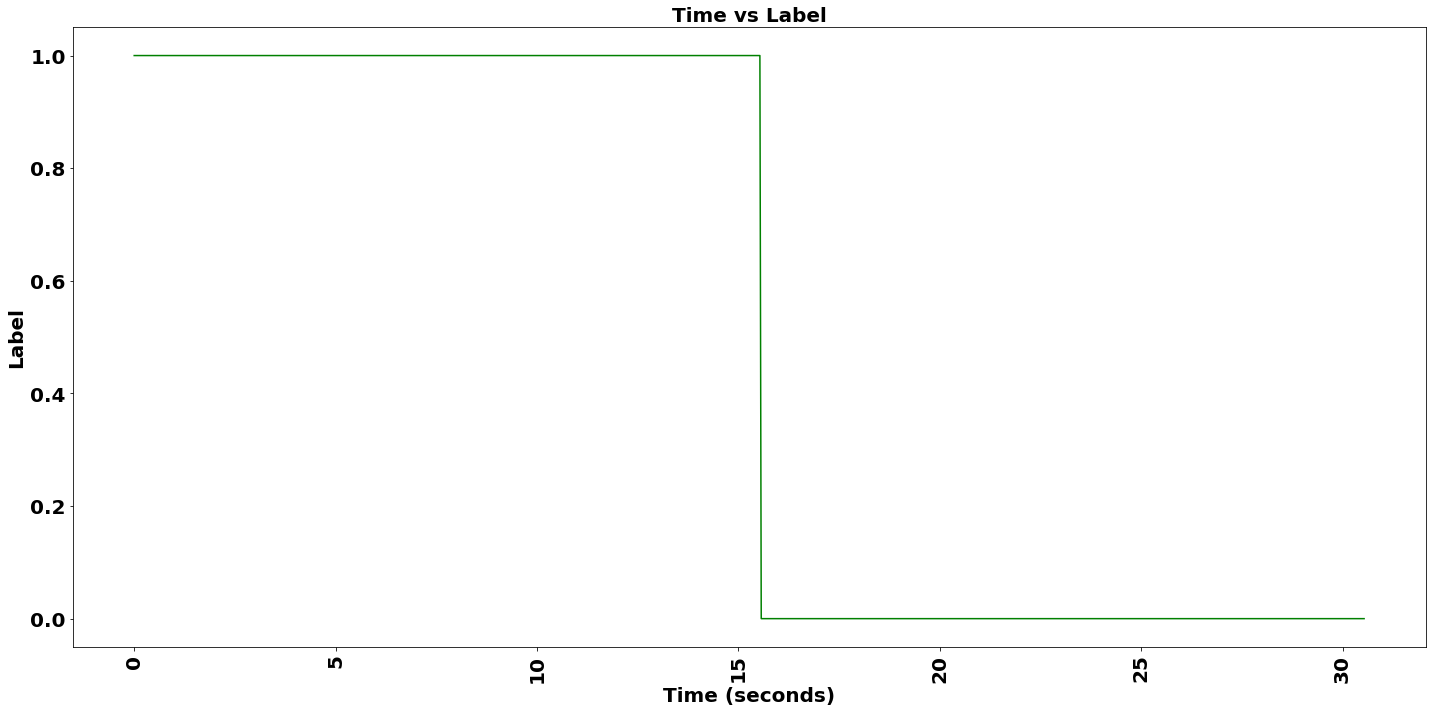

In [44]:
plt.figure(figsize=(20,10))
plt.plot(time, label1, 'g')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xticks(fontsize=20, fontweight='bold',rotation=90)
plt.yticks(fontsize=20, fontweight='bold')
plt.xlabel('Time (seconds)',fontsize=20, fontweight='bold')
plt.ylabel('Label',fontsize=20, fontweight='bold')
plt.title('Time vs Label', fontsize=20, fontweight='bold')
plt.tight_layout()
#plt.legend()
plt.savefig('Time_and_Labels_8378.pdf')  # saves the current figure
plt.show()